# World Data Visualization Prize

Team submission for the World Data Visualization Prize competition put on by the World Government Summit

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

### Initial exploration

In [6]:
ten_year_df = pd.read_csv('./data/World Dataviz Prize 2023 - What Just Happened_pivot.csv')

In [7]:
# compute percent of NA values
ten_year_df['value'].isna().sum()/len(ten_year_df['value']) # 16% NA

0.16251354279523295

In [9]:
ten_year_df.head(3)

,topic,data,year,value,metric,ten_year_change
0,Tropical Diseases,global deaths,2009,2051672.0,NaN,NaN
1,Tropical Diseases,global deaths,2010,2016434.0,NaN,NaN
2,Tropical Diseases,global deaths,2011,1960756.0,NaN,NaN


In [10]:
# merge topic and data for plotting
ten_year_df_merged = ten_year_df.copy()
ten_year_df_merged['topic'] = ten_year_df_merged['topic'] + '_' + ten_year_df_merged['data']
ten_year_df_merged = ten_year_df_merged.drop('data', axis=1)

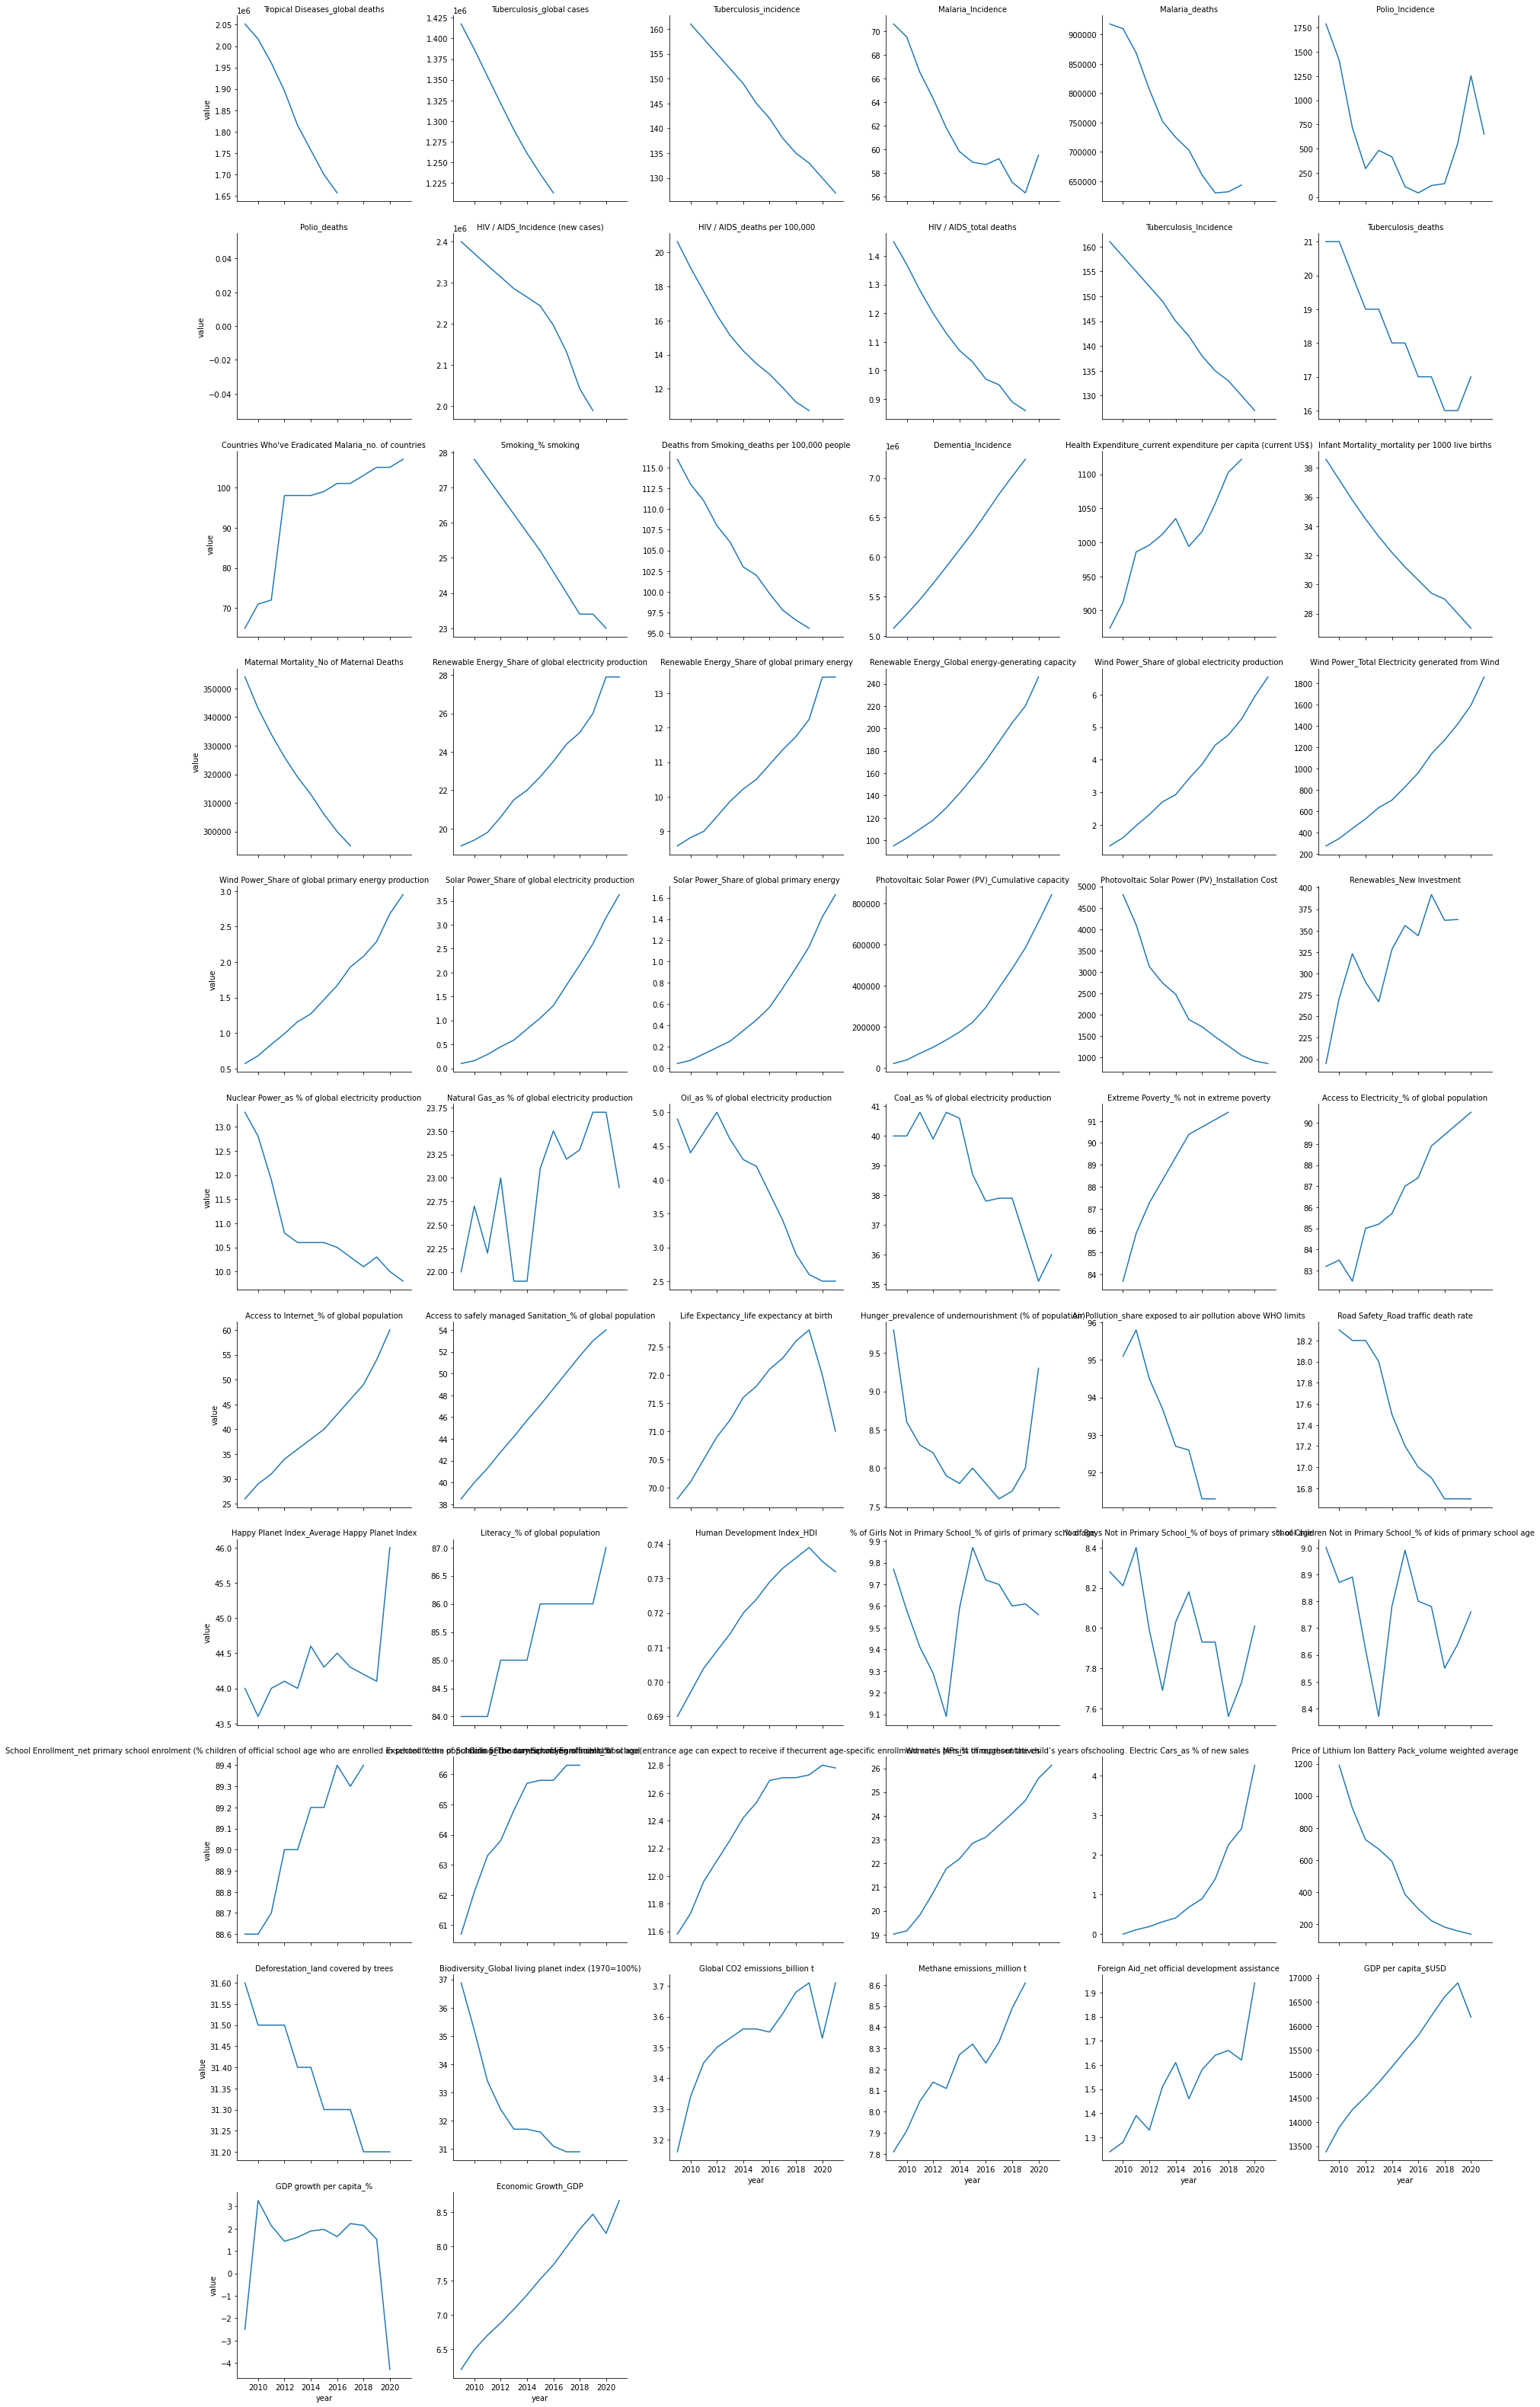

In [11]:
# good reference here: https://seaborn.pydata.org/tutorial/axis_grids.html

g = sns.FacetGrid(ten_year_df_merged, col='topic', sharey=False, col_wrap=6, height=4)
g.map(sns.lineplot, 'year', 'value')
g.set_titles(col_template = '{col_name}')

In [ ]:
# another way to do that ^
sns.relplot(data=ten_year_df, x='year', y='value', col='topic', kind='line')

### Energy Mix

In [29]:
energy_full = pd.read_csv('./data/WhatJustHappened_Energy_20230115.csv').rename(columns={'Unnamed: 0': 'year'})
energy = energy_full.set_index(energy_full['year'])
energy = energy[((energy.index <= 2020) & (energy.index >= 2010))].drop('year', axis=1)

energy.head(3)

,renew_share,renew_pri,renew_cap,wind_share,wind_prod,wind_pri,solar_share,solar_pri,solar_pc_cap,solar_pc_install,renew_invest,nuclear_share,gas_share,oil_share,coal_share
year,,,,,,,,,,,,,,,
2010,19.4,8.81,102.0,1.61,346,0.68,0.16,0.07,"40,338",4808.0,271.0,12.8,22.7,4.4,40.0
2011,19.8,8.99,110.0,1.98,440,0.84,0.29,0.13,"72,216",4104.0,323.0,11.9,22.2,4.7,40.8
2012,20.6,9.42,118.0,2.32,530,0.99,0.45,0.19,"101,745",3124.0,290.0,10.8,23.0,5.0,39.9


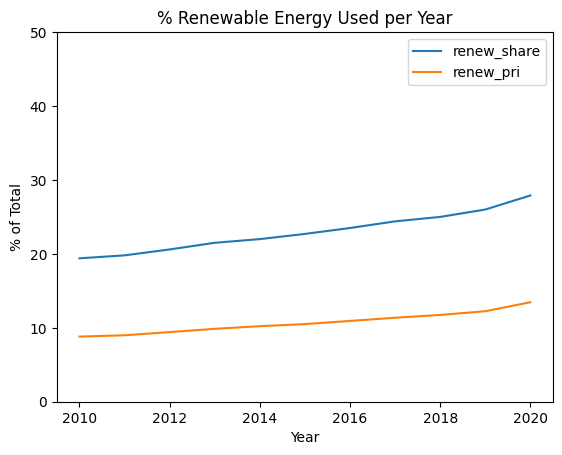

In [64]:
plt.plot(energy['renew_share'])
plt.plot(energy['renew_pri'])
plt.title('% Renewable Energy Used per Year')
plt.xlabel('Year')
plt.ylabel('% of Total')
plt.ylim((0, 50))

plt.legend(['renew_share', 'renew_pri'])
plt.show()

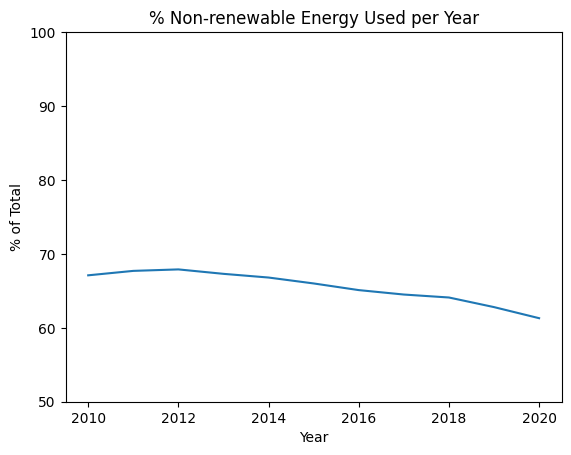

In [61]:
energy['nonrenew_share'] = energy['gas_share'] + energy['oil_share'] + energy['coal_share']
plt.plot(energy['nonrenew_share'])
plt.title('% Non-renewable Energy Used per Year')
plt.xlabel('Year')
plt.ylabel('% of Total')
plt.ylim((50, 100))
plt.show()

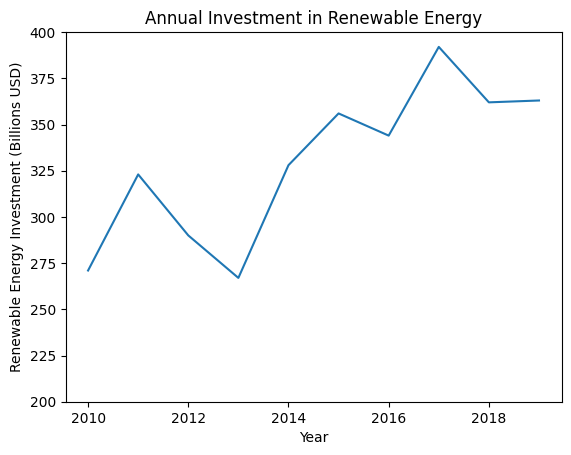

In [57]:
plt.plot(energy['renew_invest'])
plt.title('Annual Investment in Renewable Energy')
plt.ylabel('Renewable Energy Investment (Billions USD)')
plt.xlabel('Year')
plt.ylim((200, 400))
plt.show()

### Plotting Countries

In [107]:
expend = pd.read_csv('data/Environmental_Protection_Expenditures.csv')
expend.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Unit,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on biodiversity & landscape protec...,"International Monetary Fund (IMF), Statistics ...",GENB_G14,Expenditure on Biodiversity & Landscape Protec...,"Government and Public Sector Finance, Expendit...",Domestic Currency,...,NaN,NaN,NaN,NaN,1.243785e+08,1.258269e+09,NaN,NaN,NaN,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on biodiversity & landscape protec...,"International Monetary Fund (IMF), Statistics ...",GENB_G14,Expenditure on Biodiversity & Landscape Protec...,"Government and Public Sector Finance, Expendit...",Percent of GDP,...,NaN,NaN,NaN,NaN,9.433491e-03,9.134202e-02,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on environment protection,"International Monetary Fund (IMF), Statistics ...",GEN_G14,Environmental Protection Expenditures,"Government and Public Sector Finance, Expendit...",Domestic Currency,...,2.846995e+09,3.344665e+09,2.204964e+09,1.122601e+09,1.702933e+09,2.377937e+09,NaN,NaN,NaN,NaN
3,4,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on environment protection,"International Monetary Fund (IMF), Statistics ...",GEN_G14,Environmental Protection Expenditures,"Government and Public Sector Finance, Expendit...",Percent of GDP,...,2.754469e-01,2.994793e-01,1.863813e-01,9.152359e-02,1.291590e-01,1.726226e-01,NaN,NaN,NaN,NaN
4,5,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on environmental protection n.e.c.,"International Monetary Fund (IMF), Statistics ...",GENO_G14,Expenditure on Environmental Protection Not El...,"Government and Public Sector Finance, Expendit...",Domestic Currency,...,NaN,NaN,NaN,NaN,9.669078e+07,8.846917e+07,NaN,NaN,NaN,NaN


In [108]:
expend = expend[expend['Unit'] == 'Percent of GDP'].head(20).fillna(int(0))

In [109]:
expend = expend[['Country', 'ISO3', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020']]

In [110]:
expend = expend.groupby(['Country']).agg('sum')

In [111]:
expend.index

Index(['Afghanistan, Islamic Rep. of', 'Albania', 'Algeria', 'Angola'], dtype='object', name='Country')

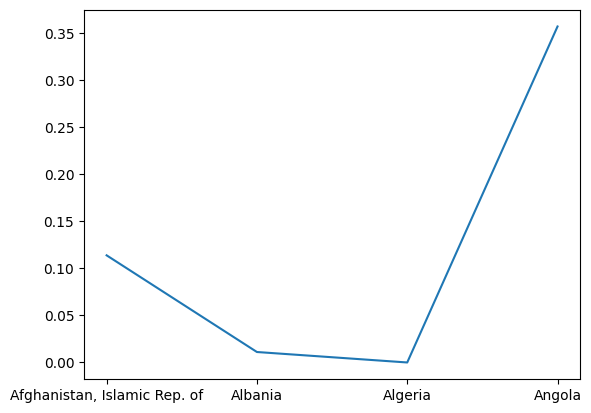

In [112]:
plt.plot(expend.index, np.array(expend['F2010']))